# **Author** :- Zeel Patel

**Task 2 : Prediction using Unsupervised Learning**

Predict the optimum number of clusters
and represent it visually.

# **Step - 1**
# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Step - 2**
# Import the data

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# **Step - 3**
# Find optimal number of clusters for K-means classification

In [ ]:
x = iris.iloc[:,[0, 1, 2, 3]].values
wcss = []

from sklearn.cluster import KMeans

for i in range(1,11):
  km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10,
              random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)


# **Step - 4**
# Plot linear graph

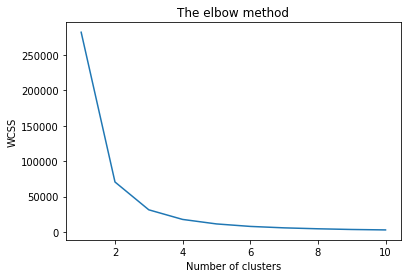

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

As we can see in the graph, 'the elbow' is visible. Most optimum clusters are present where elbow occurs.It happens when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.

From this graphical representation we take **k = 3**

# **Step - 5**
# Creating K-Means Classifier

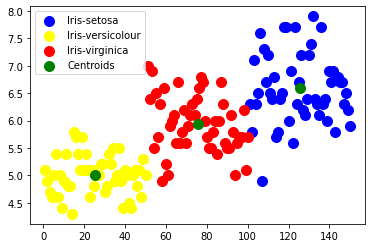

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, 
            random_state = 0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()